## 甘州图灵封神榜 2024-06-03 上榜数据分析

In [25]:
from IPython.display import Markdown, display
import pywencai
import pandas as pd
from datetime import datetime
import akshare as ak

import warnings

# 忽略所有警告信息
warnings.filterwarnings('ignore')

current_time = datetime.now().strftime("%Y-%m-%d %H:%M")

In [11]:
data_type ={
    '上榜时间': str, 
    '股票代码': str, 
    '股票名称': str, 
    '现价': float, 
    '涨跌幅': float, 
    '成交额': float
  }

df = pd.read_csv("leaderboard.csv",dtype=data_type)
df['date'] = pd.to_datetime(df['上榜时间'])
df = df.set_index('date')
df
df_all=df

In [13]:
# 按'股票代码'分组并计算累计计数
df['cumcount'] = df.groupby('股票代码').cumcount()

# 筛选出每个股票代码第一次上榜的记录（cumcount为0）
df_first_occurrence = df[df['cumcount'] == 0]

# 删除辅助列'cumcount'
df_first_occurrence.drop(columns=['cumcount'], inplace=True)

# 显示结果
# print(df_first_occurrence)
print(df_first_occurrence.shape)

(17, 8)


In [14]:
# 获取沪深A股的今日OHLC数据
def get_today_ohlc(stock_code):
    symbol = f"sh{stock_code}" if stock_code[:1] == '6' else f"sz{stock_code}"
    start_date: str = "20240530"
    stock_zh_a_daily_df = ak.stock_zh_a_daily(symbol=symbol,start_date=start_date)
    if stock_zh_a_daily_df.empty:
        return pd.Series([None] * 4, index=['open', 'high', 'low', 'close'])
    else:
        return stock_zh_a_daily_df.iloc[-1]

# 使用apply函数简化循环，并确保返回的Series长度与DataFrame行数匹配
ohlc_columns = ['open', 'high', 'low', 'close']
df = df_first_occurrence
df = df.apply(lambda row: get_today_ohlc(row['股票代码']), axis=1)[ohlc_columns]
# print(df)
df_first_occurrence = pd.concat([df_first_occurrence, df], axis=1)
# 显示更新后的DataFrame
print(df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅', 'open', 'high', 'low', 'close']])

                       股票代码  股票名称     现价    涨跌幅   open   high    low  close
date                                                                       
2024-06-03 10:03:36  600171  上海贝岭  16.98   1.98  16.00  17.25  15.83  16.78
2024-06-03 10:03:36  300458  全志科技  21.62   4.19  20.66  21.88  20.48  21.46
2024-06-03 10:03:36  300408  三环集团  29.67   1.99  29.25  29.75  28.97  29.42
2024-06-03 10:03:36  601919  中远海控  15.92   5.85  15.44  16.19  15.41  16.06
2024-06-03 10:03:36  300661  圣邦股份  79.45   2.42  77.25  79.95  77.25  78.95
2024-06-03 10:13:37  600161  天坛生物  30.47   7.52  28.76  30.55  28.43  30.07
2024-06-03 10:13:37  002938  鹏鼎控股  30.28   1.27  29.69  30.76  29.58  30.19
2024-06-03 10:13:37  300502   新易盛  93.17   7.43  88.00  96.99  87.90  95.35
2024-06-03 10:18:12  002463  沪电股份  33.13   6.02  31.30  34.28  31.30  33.45
2024-06-03 10:32:24  002916  深南电路  97.33   8.23  90.01  97.38  90.01  93.90
2024-06-03 10:32:24  603986  兆易创新  86.82   4.46  84.01  87.02  83.50  86.17
2024-06-03 1

### 计算每笔交易的日收益率

In [15]:
df_first_occurrence['日收益率'] =round(100 * (df_first_occurrence['close'] - df_first_occurrence['现价']) /
                                    df_first_occurrence['现价'],2) 
df = df_first_occurrence[['股票代码', '股票名称', '现价', '涨跌幅',  'close','日收益率']]


def create_markdown_link(row):
    stock_code = row['股票代码']
    stock_name = row['股票名称']
    # 构建Markdown超链接字符串
    link = f"[{stock_name}](https://www.iwencai.com/unifiedwap/result?w={stock_code}&querytype=stock)"
    return link

# 使用apply函数为股票名称添加Markdown超链接
df['股票名称'] = df.apply(lambda row: create_markdown_link(row), axis=1)
display(Markdown(df.to_markdown()))


| date                |   股票代码 | 股票名称                                                                       |   现价 |   涨跌幅 |   close |   日收益率 |
|:--------------------|-----------:|:-------------------------------------------------------------------------------|-------:|---------:|--------:|-----------:|
| 2024-06-03 10:03:36 |     600171 | [上海贝岭](https://www.iwencai.com/unifiedwap/result?w=600171&querytype=stock) |  16.98 |     1.98 |   16.78 |      -1.18 |
| 2024-06-03 10:03:36 |     300458 | [全志科技](https://www.iwencai.com/unifiedwap/result?w=300458&querytype=stock) |  21.62 |     4.19 |   21.46 |      -0.74 |
| 2024-06-03 10:03:36 |     300408 | [三环集团](https://www.iwencai.com/unifiedwap/result?w=300408&querytype=stock) |  29.67 |     1.99 |   29.42 |      -0.84 |
| 2024-06-03 10:03:36 |     601919 | [中远海控](https://www.iwencai.com/unifiedwap/result?w=601919&querytype=stock) |  15.92 |     5.85 |   16.06 |       0.88 |
| 2024-06-03 10:03:36 |     300661 | [圣邦股份](https://www.iwencai.com/unifiedwap/result?w=300661&querytype=stock) |  79.45 |     2.42 |   78.95 |      -0.63 |
| 2024-06-03 10:13:37 |     600161 | [天坛生物](https://www.iwencai.com/unifiedwap/result?w=600161&querytype=stock) |  30.47 |     7.52 |   30.07 |      -1.31 |
| 2024-06-03 10:13:37 |     002938 | [鹏鼎控股](https://www.iwencai.com/unifiedwap/result?w=002938&querytype=stock) |  30.28 |     1.27 |   30.19 |      -0.3  |
| 2024-06-03 10:13:37 |     300502 | [新易盛](https://www.iwencai.com/unifiedwap/result?w=300502&querytype=stock)   |  93.17 |     7.43 |   95.35 |       2.34 |
| 2024-06-03 10:18:12 |     002463 | [沪电股份](https://www.iwencai.com/unifiedwap/result?w=002463&querytype=stock) |  33.13 |     6.02 |   33.45 |       0.97 |
| 2024-06-03 10:32:24 |     002916 | [深南电路](https://www.iwencai.com/unifiedwap/result?w=002916&querytype=stock) |  97.33 |     8.23 |   93.9  |      -3.52 |
| 2024-06-03 10:32:24 |     603986 | [兆易创新](https://www.iwencai.com/unifiedwap/result?w=603986&querytype=stock) |  86.82 |     4.46 |   86.17 |      -0.75 |
| 2024-06-03 10:54:31 |     600183 | [生益科技](https://www.iwencai.com/unifiedwap/result?w=600183&querytype=stock) |  20.59 |     4.1  |   20.17 |      -2.04 |
| 2024-06-03 11:07:44 |     300814 | [中富电路](https://www.iwencai.com/unifiedwap/result?w=300814&querytype=stock) |  34.2  |    17.12 |   32.51 |      -4.94 |
| 2024-06-03 15:36:48 |     300433 | [蓝思科技](https://www.iwencai.com/unifiedwap/result?w=300433&querytype=stock) |  15.52 |     1.44 |   15.52 |       0    |
| 2024-06-03 15:36:48 |     300647 | [超频三](https://www.iwencai.com/unifiedwap/result?w=300647&querytype=stock)   |   6.38 |    13.52 |    6.38 |       0    |
| 2024-06-03 15:36:48 |     301329 | [信音电子](https://www.iwencai.com/unifiedwap/result?w=301329&querytype=stock) |  23.92 |     1.7  |   23.92 |       0    |
| 2024-06-03 15:36:48 |     603890 | [春秋电子](https://www.iwencai.com/unifiedwap/result?w=603890&querytype=stock) |  11.45 |     6.51 |   11.45 |       0    |

### 交易情况统计

In [16]:
# 筛选出盈利和亏损的股票
df_profit = df_first_occurrence[df_first_occurrence['close'] > df_first_occurrence['现价']]
df_loss = df_first_occurrence[df_first_occurrence['close'] < df_first_occurrence['现价']]

# 计算胜率和亏率
total_trades = len(df_first_occurrence)
profit_trades = len(df_profit)
loss_trades = len(df_loss)

win_rate = profit_trades / total_trades
loss_rate = loss_trades / total_trades

print("总交易次数: ", total_trades)
print("胜次数: ", profit_trades)
print("亏次数: ", )
print(f"胜率: {win_rate:.2f}")
print(f"亏率: {loss_rate:.2f}")


# 计算总成本和总收益
total_cost = df_first_occurrence['现价'].sum()
total_revenue = df_first_occurrence['close'].sum()

# 计算总体收益率
overall_return = ((total_revenue - total_cost) / total_cost) * 100

print(f"当日浮盈: {overall_return:.2f}%")

总交易次数:  17
胜次数:  3
亏次数: 
胜率: 0.18
亏率: 0.59
当日浮盈: -0.80%


In [17]:
# 按'股票代码'分组并计算累计计数
df_all['cumcount'] = df_all.groupby('股票代码').cumcount()
df_all

,上榜时间,股票代码,股票名称,现价,涨跌幅,成交额,上榜涨幅,榜间涨幅,cumcount
date,,,,,,,,,
2024-06-03 10:03:36,2024-06-03 10:03:36,600171,上海贝岭,16.98,1.98,102894.35,0.06,0.06,0
2024-06-03 10:03:36,2024-06-03 10:03:36,300458,全志科技,21.62,4.19,49575.76,0.05,0.05,0
2024-06-03 10:03:36,2024-06-03 10:03:36,300408,三环集团,29.67,1.99,6594.01,0.00,0.00,0
2024-06-03 10:03:36,2024-06-03 10:03:36,601919,中远海控,15.92,5.85,184355.41,0.26,0.00,0
2024-06-03 10:03:36,2024-06-03 10:03:36,300661,圣邦股份,79.45,2.42,6165.21,-0.16,-0.16,0
...,...,...,...,...,...,...,...,...,...
2024-06-03 15:36:48,2024-06-03 15:36:48,300647,超频三,6.38,13.52,86509.35,0.00,0.00,0
2024-06-03 15:36:48,2024-06-03 15:36:48,300661,圣邦股份,78.95,1.78,22783.75,0.00,0.00,30
2024-06-03 15:36:48,2024-06-03 15:36:48,301329,信音电子,23.92,1.70,71796.27,0.00,0.00,0


In [18]:
import matplotlib.pyplot as plt
plt.rcParams["font.serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
# plt.rcParams['axes.formatter.use_locale'] - False
# print(matplotlib.matplotlib_fname())

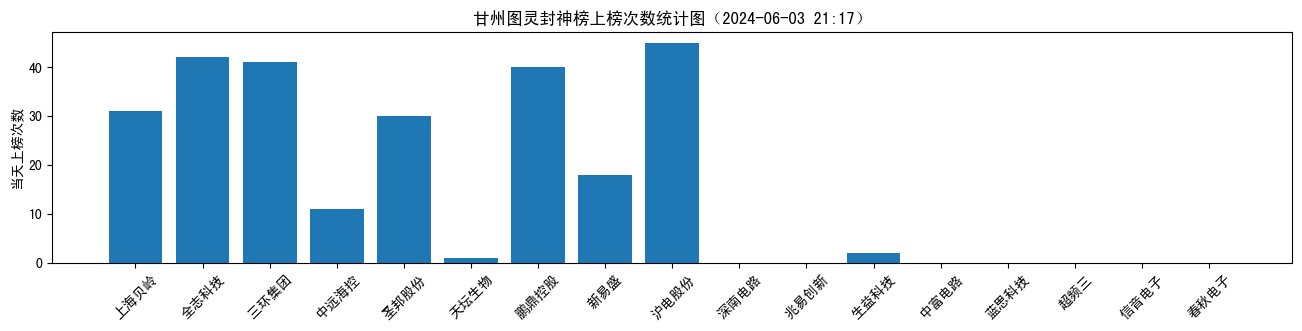

In [26]:



# 绘制柱状图
fig1 = plt.figure(figsize=(16, 3))
plt.bar(df_all['股票名称'], df_all['cumcount'])

# 添加标题和标签
plt.title(f'甘州图灵封神榜上榜次数统计图（{current_time}）')
# plt.xlabel('Category')
plt.ylabel('当天上榜次数')
# 显示图例
plt.xticks(rotation=45) 
# ax2.legend()

# # 优化label显示,非必须
# plt.autofmt_xdate()
# fig2.autofmt_xdate()
# 显示图表
plt.show()

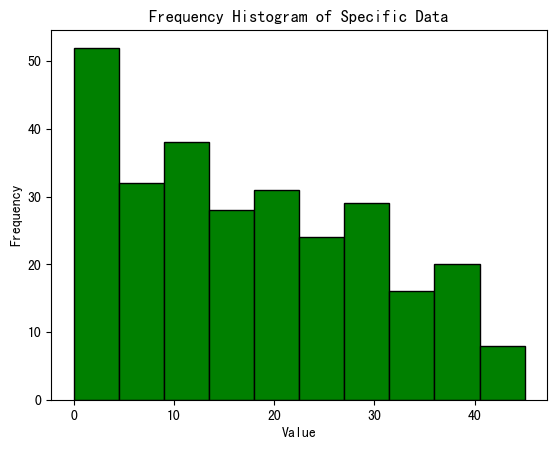

In [20]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]  # 具体的观测值列表
data = df_all['cumcount'].to_list()
plt.hist(data, bins='auto', color='green', edgecolor='black')
# 其他绘图设置保持不变
plt.title('Frequency Histogram of Specific Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Hour'>

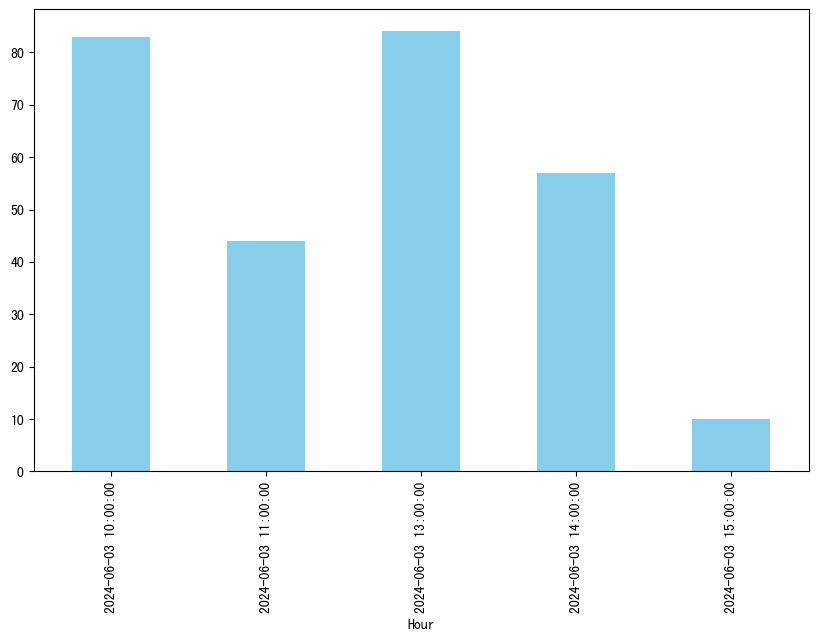

In [21]:
# 将时间分为时段，例如每小时
df_all['Hour'] = df_all.index.floor('H')  # 按小时分段
# print(df_all)

# 计算每个时段出现的次数
time_segment_counts = df_all.groupby('Hour').size()

# 绘制柱状图
plt.figure(figsize=(10, 6))  # 设置图形大小
time_segment_counts.plot(kind='bar', color='skyblue')  # 绘制柱状图

<Axes: xlabel='Hour'>

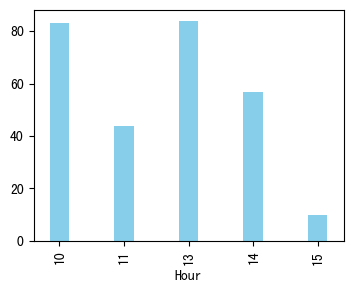

In [22]:
# 将时间分为时段，例如按小时
# df_all.index = df_all.index.normalize()  # 将时间戳转换为00:00:00的日期

# 创建一个时间段作为分组的依据，例如每小时
df_all['Hour'] = df_all.index.map(lambda x: x.hour)
# print(df_all )
# 将时间分为时段，例如每小时
# df_all['Hour'] = df_all.index.floor('H')  # 按小时分段
# print(df_all)

# 计算每个时段出现的次数
time_segment_counts = df_all.groupby('Hour').size()

# 绘制柱状图
plt.figure(figsize=(4, 3))  # 设置图形大小
time_segment_counts.plot(kind='bar', width=0.3, color='skyblue')  # 绘制柱状图

In [46]:
def get_stock_market(stock_code):
    if stock_code.startswith(('60', '68')):
        return "SH"
    elif stock_code.startswith(('0', '3')):
        return "SZ"
    elif stock_code.startswith(('4', '8')):
        return "BJ"
    else:
        return "Unknown"

In [63]:
stock_code ='300379' # df_all[:1]['股票代码'].to_list()[0]
venue = get_stock_market(stock_code)


In [23]:
df_em = ak.stock_zh_a_spot_em()
# print(df_em)
# 指定要重命名的列和新列名
new_column_names = {'代码': '股票代码', '名称': '股票名称'}

# 使用rename方法重命名列
df_renamed = df_em.rename(columns=new_column_names)

df_today = df_renamed[['股票代码','股票名称','最新价', '涨跌幅']]
df_today

,股票代码,股票名称,最新价,涨跌幅
0,920002,万达轴承,72.00,20.24
1,300822,贝仕达克,14.68,20.03
2,301176,逸豪新材,14.69,20.02
3,301306,西测测试,49.02,20.00
4,300563,神宇股份,30.30,20.00
...,...,...,...,...
5607,300300,ST峡创,1.21,-19.87
5608,300125,ST聆达,1.68,-20.00
5609,300117,*ST嘉寓,0.72,-20.00
5610,300175,朗源股份,8.11,-20.02


In [24]:
merged_df = df_first_occurrence.merge(df_today, on='股票代码', how='left', suffixes=('_df1', '_df2'))
merged_df['浮盈']=round(100 * ( merged_df['最新价'] - merged_df['现价']) / merged_df['现价'],2)
merged_df

,上榜时间,股票代码,股票名称_df1,现价,涨跌幅_df1,成交额,上榜涨幅,榜间涨幅,open,high,low,close,日收益率,股票名称_df2,最新价,涨跌幅_df2,浮盈
0,2024-06-03 10:03:36,600171,上海贝岭,16.98,1.98,102894.35,0.06,0.06,16.00,17.25,15.83,16.78,-1.18,上海贝岭,16.78,0.78,-1.18
1,2024-06-03 10:03:36,300458,全志科技,21.62,4.19,49575.76,0.05,0.05,20.66,21.88,20.48,21.46,-0.74,全志科技,21.46,3.42,-0.74
2,2024-06-03 10:03:36,300408,三环集团,29.67,1.99,6594.01,0.00,0.00,29.25,29.75,28.97,29.42,-0.84,三环集团,29.42,1.13,-0.84
3,2024-06-03 10:03:36,601919,中远海控,15.92,5.85,184355.41,0.26,0.00,15.44,16.19,15.41,16.06,0.88,中远海控,16.06,6.78,0.88
4,2024-06-03 10:03:36,300661,圣邦股份,79.45,2.42,6165.21,-0.16,-0.16,77.25,79.95,77.25,78.95,-0.63,圣邦股份,78.95,1.78,-0.63
5,2024-06-03 10:13:37,600161,天坛生物,30.47,7.52,38534.33,0.00,0.04,28.76,30.55,28.43,30.07,-1.31,天坛生物,30.07,6.10,-1.31
6,2024-06-03 10:13:37,002938,鹏鼎控股,30.28,1.27,16879.39,0.00,0.00,29.69,30.76,29.58,30.19,-0.30,鹏鼎控股,30.19,0.97,-0.30
7,2024-06-03 10:13:37,300502,新易盛,93.17,7.43,193972.28,-0.12,-0.03,88.00,96.99,87.90,95.35,2.34,新易盛,95.35,9.94,2.34
8,2024-06-03 10:18:12,002463,沪电股份,33.13,6.02,110876.11,0.00,0.00,31.30,34.28,31.30,33.45,0.97,沪电股份,33.45,7.04,0.97
9,2024-06-03 10:32:24,002916,深南电路,97.33,8.23,42599.67,0.00,0.00,90.01,97.38,90.01,93.90,-3.52,深南电路,93.90,4.41,-3.52


## 成交额排名前100的股票的涨幅直方图

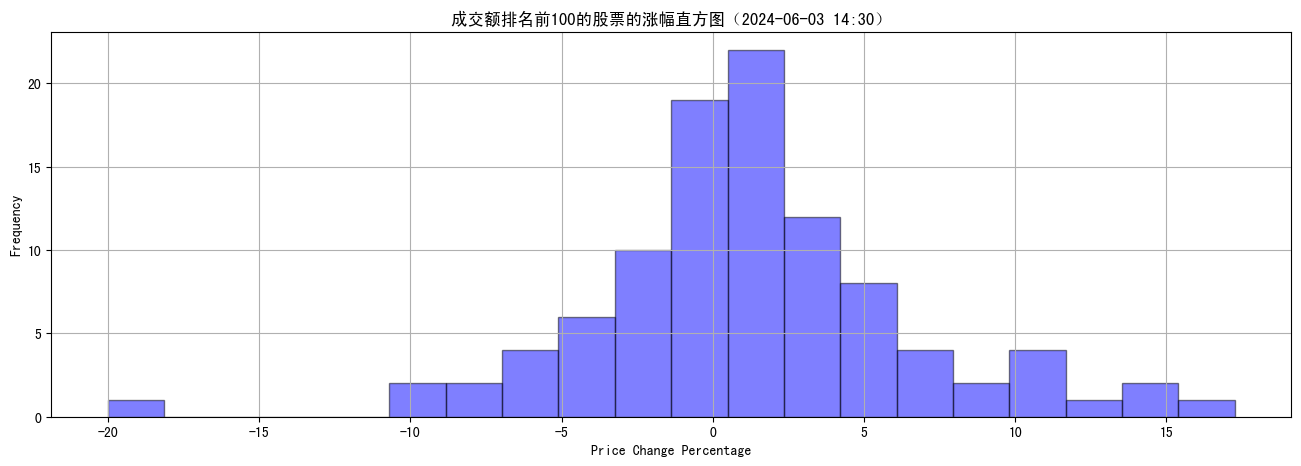

In [113]:
import akshare as ak
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# 使用akshare获取成交额排名前100的股票数据
top100_stocks = ak.stock_zh_a_spot_em()

# 对股票按照成交额进行降序排序，并筛选出前100名的股票代码
top100_stocks = trade_data.sort_values(by='成交额',ascending=False).head(100)
# 提取股票代码和涨跌幅
# 假设top100_stocks是一个DataFrame，其中包含'代码'和'涨跌幅'列
# 这里需要根据实际返回的数据结构进行调整
stock_codes = top100_stocks['代码'].values
pct_changes = top100_stocks['涨跌幅'].values

# 由于股票代码和涨跌幅是数值型的，我们需要将股票代码转换为字符串
stock_str_codes = [str(code) for code in stock_codes]

# 创建一个新的DataFrame来存储股票代码和涨跌幅
df = pd.DataFrame({'股票代码': stock_str_codes, '涨跌幅': pct_changes})

# 绘制涨幅直方图
plt.figure(figsize=(16, 5))
plt.hist(df['涨跌幅'], bins=20, alpha=0.5, color='blue', edgecolor='black')

# 添加标题和标签
plt.title(f'成交额排名前100的股票的涨幅直方图（{current_time}）')
plt.xlabel('Price Change Percentage')
plt.ylabel('Frequency')
plt.grid(True)

# 显示图形

plt.show()


# 用akshare的stock_zh_a_spot_em接口获取数据，绘制成交额排名前100的股票的涨幅直方图，给我写出工程化程度最高的实现代码